#  diff/same/hps/lps test on model trained on frontal faces - normalized by max value of all types

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df = pd.read_csv('/home/administrator/experiments/high_importance_features_full_dataset/vgg16/results/comparisons.csv')

# df = pd.read_csv('/home/administrator/experiments/5_ids_300_img_per_id_val_50/vgg16/results/comparisons_with_fc7_linear.csv')
df = pd.read_csv('/home/administrator/experiments/1000_ids_20_train/vgg16/results/comparisons_with_fc7_linear.csv')

title = '1000_ids_20_train_cf'
treshold =224.775

# df = pd.read_csv(r"/home/administrator/experiments/500_ids_300_img_per_id_2/vgg16/results/100_ids_non_frontal_300_per_id_comparison.csv")
pd.set_option('display.max_rows', df.shape[0]+1)

print(df)

                                            Unnamed: 0       conv5  \
0                         ('ak_ref.png', 'ba_ref.png')  159.163790   
1                         ('ba_ref.png', 'dd_ref.png')  179.082240   
2                         ('dd_ref.png', 'gc_ref.png')  180.948070   
3                         ('gc_ref.png', 'jb_ref.png')  185.550980   
4                         ('jb_ref.png', 'js_ref.png')  173.302150   
5                         ('js_ref.png', 'md_ref.png')  184.621350   
6                         ('md_ref.png', 'mz_ref.png')  161.970440   
7                         ('mz_ref.png', 'rn_ref.png')  170.621810   
8                         ('rn_ref.png', 'th_ref.png')  147.214890   
9                         ('th_ref.png', 'ak_ref.png')  172.648800   
10                ('CM46_2.png', 'Cpict47_set1_0.png')  109.181800   
11                ('CM47_2.png', 'Cpict48_set1_0.png')  130.740690   
12                 ('CM48_2.png', 'Cpic50_set1_0.png')  135.542100   
13                 (

In [2]:
# change unnamed column to 'pairs'
df = df.rename(columns = {'Unnamed: 0':'pairs'})
df

,pairs,conv5,conv3,fc7,output,conv1,fc8,conv4,conv2,fc6,input,type
0,"('ak_ref.png', 'ba_ref.png')",159.163790,1737.02470,307.965330,244.517550,370.44495,244.517550,610.99400,791.82690,119.258470,176.927380,diff_pairs
1,"('ba_ref.png', 'dd_ref.png')",179.082240,1522.61390,331.920600,299.276400,265.92630,299.276400,630.65770,551.96450,129.999220,142.596950,diff_pairs
2,"('dd_ref.png', 'gc_ref.png')",180.948070,1298.90540,379.995850,348.015660,226.00403,348.015660,571.17035,453.74713,138.979000,118.918950,diff_pairs
3,"('gc_ref.png', 'jb_ref.png')",185.550980,1273.17000,371.141720,307.997960,232.56548,307.997960,564.90265,440.68823,143.967390,137.082900,diff_pairs
4,"('jb_ref.png', 'js_ref.png')",173.302150,1317.35620,379.184080,302.866500,280.26715,302.866500,590.99770,498.34616,140.929580,162.429760,diff_pairs
5,"('js_ref.png', 'md_ref.png')",184.621350,1369.75480,391.494230,364.964500,331.67926,364.964500,606.02790,531.53430,144.035930,225.679430,diff_pairs
6,"('md_ref.png', 'mz_ref.png')",161.970440,1257.69970,308.898830,270.578400,268.13116,270.578400,544.27090,474.54987,128.325820,174.975140,diff_pairs
7,"('mz_ref.png', 'rn_ref.png')",170.621810,1413.24230,363.509030,356.058500,274.33200,356.058500,599.91490,498.64758,132.841310,159.546300,diff_pairs
8,"('rn_ref.png', 'th_ref.png')",147.214890,1401.07950,237.452710,204.770780,281.66046,204.770780,612.34780,562.60565,101.633630,152.516480,diff_pairs
9,"('th_ref.png', 'ak_ref.png')",172.648800,1802.90760,316.814730,304.342560,398.61707,304.342560,704.07245,838.47580,119.651146,201.079940,diff_pairs


In [3]:
#split the tuples to two columns
df_splited = df['pairs'].str.split(',', expand=True)

#adding   
df.insert(loc=0, column='img1', value=df_splited[0] )
df.insert(loc=1, column='img2', value=df_splited[1] )

  
# Dropping old Name columns 
df.drop(columns =["pairs"], inplace = True) 


In [4]:
df

,img1,img2,conv5,conv3,fc7,output,conv1,fc8,conv4,conv2,fc6,input,type
0,('ak_ref.png','ba_ref.png'),159.163790,1737.02470,307.965330,244.517550,370.44495,244.517550,610.99400,791.82690,119.258470,176.927380,diff_pairs
1,('ba_ref.png','dd_ref.png'),179.082240,1522.61390,331.920600,299.276400,265.92630,299.276400,630.65770,551.96450,129.999220,142.596950,diff_pairs
2,('dd_ref.png','gc_ref.png'),180.948070,1298.90540,379.995850,348.015660,226.00403,348.015660,571.17035,453.74713,138.979000,118.918950,diff_pairs
3,('gc_ref.png','jb_ref.png'),185.550980,1273.17000,371.141720,307.997960,232.56548,307.997960,564.90265,440.68823,143.967390,137.082900,diff_pairs
4,('jb_ref.png','js_ref.png'),173.302150,1317.35620,379.184080,302.866500,280.26715,302.866500,590.99770,498.34616,140.929580,162.429760,diff_pairs
5,('js_ref.png','md_ref.png'),184.621350,1369.75480,391.494230,364.964500,331.67926,364.964500,606.02790,531.53430,144.035930,225.679430,diff_pairs
6,('md_ref.png','mz_ref.png'),161.970440,1257.69970,308.898830,270.578400,268.13116,270.578400,544.27090,474.54987,128.325820,174.975140,diff_pairs
7,('mz_ref.png','rn_ref.png'),170.621810,1413.24230,363.509030,356.058500,274.33200,356.058500,599.91490,498.64758,132.841310,159.546300,diff_pairs
8,('rn_ref.png','th_ref.png'),147.214890,1401.07950,237.452710,204.770780,281.66046,204.770780,612.34780,562.60565,101.633630,152.516480,diff_pairs
9,('th_ref.png','ak_ref.png'),172.648800,1802.90760,316.814730,304.342560,398.61707,304.342560,704.07245,838.47580,119.651146,201.079940,diff_pairs


In [5]:
#reorder columns by layer order
df = df[['img1', 'img2', 'input', 'conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8','type' ]]

In [6]:
df

,img1,img2,input,conv1,conv2,conv3,conv4,conv5,fc6,fc7,fc8,type
0,('ak_ref.png','ba_ref.png'),176.927380,370.44495,791.82690,1737.02470,610.99400,159.163790,119.258470,307.965330,244.517550,diff_pairs
1,('ba_ref.png','dd_ref.png'),142.596950,265.92630,551.96450,1522.61390,630.65770,179.082240,129.999220,331.920600,299.276400,diff_pairs
2,('dd_ref.png','gc_ref.png'),118.918950,226.00403,453.74713,1298.90540,571.17035,180.948070,138.979000,379.995850,348.015660,diff_pairs
3,('gc_ref.png','jb_ref.png'),137.082900,232.56548,440.68823,1273.17000,564.90265,185.550980,143.967390,371.141720,307.997960,diff_pairs
4,('jb_ref.png','js_ref.png'),162.429760,280.26715,498.34616,1317.35620,590.99770,173.302150,140.929580,379.184080,302.866500,diff_pairs
5,('js_ref.png','md_ref.png'),225.679430,331.67926,531.53430,1369.75480,606.02790,184.621350,144.035930,391.494230,364.964500,diff_pairs
6,('md_ref.png','mz_ref.png'),174.975140,268.13116,474.54987,1257.69970,544.27090,161.970440,128.325820,308.898830,270.578400,diff_pairs
7,('mz_ref.png','rn_ref.png'),159.546300,274.33200,498.64758,1413.24230,599.91490,170.621810,132.841310,363.509030,356.058500,diff_pairs
8,('rn_ref.png','th_ref.png'),152.516480,281.66046,562.60565,1401.07950,612.34780,147.214890,101.633630,237.452710,204.770780,diff_pairs
9,('th_ref.png','ak_ref.png'),201.079940,398.61707,838.47580,1802.90760,704.07245,172.648800,119.651146,316.814730,304.342560,diff_pairs


In [7]:
#remove all last rows - save only DIFF,HPS,LPS,SAME type.

df = df[~df.type.str.contains("frontal")]


In [8]:
df

,img1,img2,input,conv1,conv2,conv3,conv4,conv5,fc6,fc7,fc8,type
0,('ak_ref.png','ba_ref.png'),176.927380,370.44495,791.82690,1737.02470,610.99400,159.163790,119.258470,307.965330,244.517550,diff_pairs
1,('ba_ref.png','dd_ref.png'),142.596950,265.92630,551.96450,1522.61390,630.65770,179.082240,129.999220,331.920600,299.276400,diff_pairs
2,('dd_ref.png','gc_ref.png'),118.918950,226.00403,453.74713,1298.90540,571.17035,180.948070,138.979000,379.995850,348.015660,diff_pairs
3,('gc_ref.png','jb_ref.png'),137.082900,232.56548,440.68823,1273.17000,564.90265,185.550980,143.967390,371.141720,307.997960,diff_pairs
4,('jb_ref.png','js_ref.png'),162.429760,280.26715,498.34616,1317.35620,590.99770,173.302150,140.929580,379.184080,302.866500,diff_pairs
5,('js_ref.png','md_ref.png'),225.679430,331.67926,531.53430,1369.75480,606.02790,184.621350,144.035930,391.494230,364.964500,diff_pairs
6,('md_ref.png','mz_ref.png'),174.975140,268.13116,474.54987,1257.69970,544.27090,161.970440,128.325820,308.898830,270.578400,diff_pairs
7,('mz_ref.png','rn_ref.png'),159.546300,274.33200,498.64758,1413.24230,599.91490,170.621810,132.841310,363.509030,356.058500,diff_pairs
8,('rn_ref.png','th_ref.png'),152.516480,281.66046,562.60565,1401.07950,612.34780,147.214890,101.633630,237.452710,204.770780,diff_pairs
9,('th_ref.png','ak_ref.png'),201.079940,398.61707,838.47580,1802.90760,704.07245,172.648800,119.651146,316.814730,304.342560,diff_pairs


In [9]:
max_value_df = df.max()
max_value_df

img1      ('th_ref.png'
img2      'th_ref.png')
input           262.488
conv1           451.802
conv2           925.184
conv3           1849.92
conv4           704.072
conv5           214.213
fc6             182.222
fc7             555.906
fc8              516.89
type         same_pairs
dtype: object

In [10]:
df = df.reset_index(drop=True)
df
df = df.drop(columns=['img1', 'img2'])

In [11]:
normalized_treshold = treshold/max_value_df['fc7']


In [12]:
df
# df['input']= (df['input']/df['input'].max()) 

for x in df.drop(columns=['type']).columns:
    df[x]= (df[x]/df[x].max()) 

In [13]:

df.to_csv('1000_ids_cf')

In [14]:
df

,input,conv1,conv2,conv3,conv4,conv5,fc6,fc7,fc8,type
0,0.674040,0.819927,0.855859,0.938975,0.867800,0.743015,0.654468,0.553988,0.473055,diff_pairs
1,0.543251,0.588590,0.596600,0.823072,0.895728,0.835999,0.713412,0.597080,0.578994,diff_pairs
2,0.453045,0.500228,0.490440,0.702143,0.811238,0.844709,0.762691,0.683561,0.673287,diff_pairs
3,0.522244,0.514750,0.476325,0.688231,0.802336,0.866197,0.790066,0.667634,0.595867,diff_pairs
4,0.618808,0.620331,0.538646,0.712117,0.839399,0.809016,0.773395,0.682101,0.585940,diff_pairs
5,0.859770,0.734125,0.574517,0.740441,0.860747,0.861857,0.790443,0.704245,0.706077,diff_pairs
6,0.666602,0.593470,0.512925,0.679868,0.773033,0.756117,0.704228,0.555667,0.523474,diff_pairs
7,0.607823,0.607195,0.538971,0.763949,0.852064,0.796504,0.729009,0.653904,0.688847,diff_pairs
8,0.581042,0.623415,0.608101,0.757374,0.869723,0.687235,0.557747,0.427145,0.396159,diff_pairs
9,0.766054,0.882282,0.906280,0.974589,1.000000,0.805966,0.656623,0.569907,0.588795,diff_pairs


In [15]:
#mean of each columns by type of pairs
means_df = df.groupby(['type']).mean()
means_df = means_df.rename_axis("layers", axis="columns")
means_df

layers,input,conv1,conv2,conv3,conv4,conv5,fc6,fc7,fc8
type,,,,,,,,,
diff_pairs,0.525321,0.620632,0.613091,0.735953,0.781959,0.720874,0.642398,0.545272,0.549354
high_ps_pairs,0.520885,0.650627,0.650890,0.734796,0.771868,0.752716,0.708269,0.646580,0.684333
low_ps_pairs,0.551673,0.600942,0.579353,0.700469,0.692981,0.548145,0.436151,0.321601,0.280963
same_pairs,0.443365,0.503198,0.505926,0.658134,0.624364,0.432789,0.308622,0.212742,0.183392


In [16]:
means_df = means_df.transpose()
means_df

type,diff_pairs,high_ps_pairs,low_ps_pairs,same_pairs
layers,,,,
input,0.525321,0.520885,0.551673,0.443365
conv1,0.620632,0.650627,0.600942,0.503198
conv2,0.613091,0.650890,0.579353,0.505926
conv3,0.735953,0.734796,0.700469,0.658134
conv4,0.781959,0.771868,0.692981,0.624364
conv5,0.720874,0.752716,0.548145,0.432789
fc6,0.642398,0.708269,0.436151,0.308622
fc7,0.545272,0.646580,0.321601,0.212742
fc8,0.549354,0.684333,0.280963,0.183392


In [17]:
# means_df = means_df.reindex(['input', 'conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8' ])
# means_df

In [18]:
plot_kwargs={'grid':True,'figsize':(20,8),
 'fontsize':12}


In [19]:
normalized_treshold

0.40433986962906143

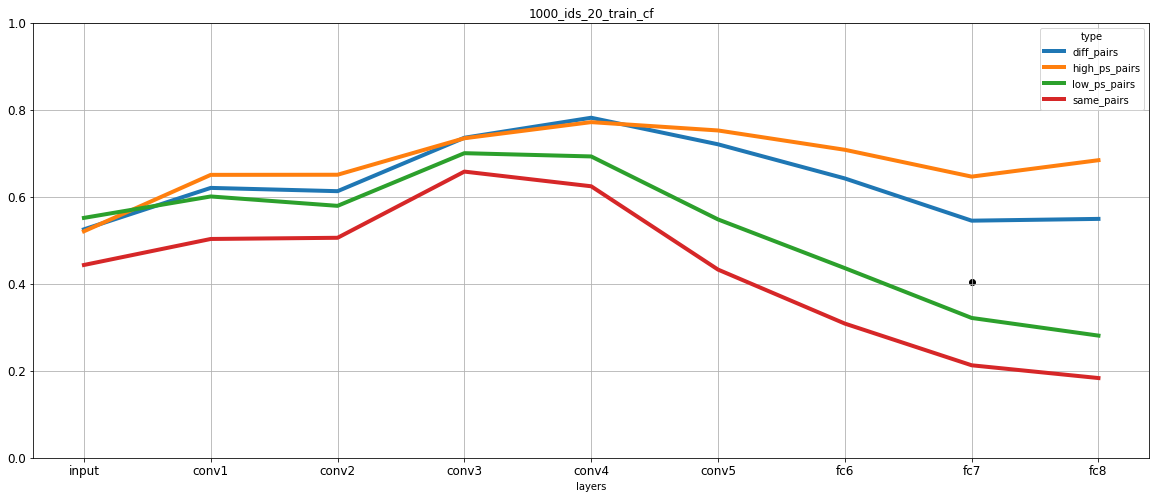

In [20]:
plot = means_df.plot(**plot_kwargs, title = title, ylim = [0,1], lw=4)
# plt.axhline(y=normalized_treshold, color='black', linestyle='--')
plt.scatter(7, normalized_treshold, color='black')


In [21]:
std_df = df.groupby(['type']).std()
std_df['fc7']

type
diff_pairs       0.130685
high_ps_pairs    0.149405
low_ps_pairs     0.076200
same_pairs       0.119767
Name: fc7, dtype: float64